# Multi-Objective Fairness Analysis

This notebook runs multi-objective hyperparameter optimization for fairness-aware machine learning.

**Approach 1**: Standard models (RF, MLP) trained WITH sensitive features, evaluated using counterfactual consistency.

## Objectives
1. **Accuracy** - Balanced accuracy on the test set
2. **Fairness** - Counterfactual consistency (predictions unchanged when flipping sensitive attribute)

## Visualizations
1. **Pareto Front Comparison** - Compare trade-offs between RF and MLP
2. **Parallel Coordinate Plot** - See how hyperparameters affect both objectives
3. **MDS Projection** - Visualize the hyperparameter search space in 2D


In [1]:
# Add src to path
import sys
sys.path.insert(0, '../src')

# Import main module
from main import (
    main,
    run_optimization,
    get_dataset_config,
    list_available_datasets,
    plot_pareto_comparison,
    plot_parallel_coordinates,
    plot_mds_projection,
    generate_all_visualizations,
    get_pareto_front,
    print_pareto_summary,
)
from utils.datasets import load_dataset

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

print("Available datasets:", list_available_datasets())


Available datasets: ['adult', 'german_credit', 'compas']


## 1. Configuration

Set experiment parameters below:


In [2]:
# Experiment configuration
DATASET_NAME = "adult"          # Dataset to use
SENSITIVE_FEATURE = "sex"       # Sensitive feature for counterfactual
WALLTIME_LIMIT = 300            # Time limit per model (seconds) - increase for better results
N_TRIALS = 300                   # Max configurations per model - increase for better results

# Output directory
OUTPUT_DIR = "../plots"

print(f"Configuration:")
print(f"  Dataset: {DATASET_NAME}")
print(f"  Sensitive feature: {SENSITIVE_FEATURE}")
print(f"  Time limit per model: {WALLTIME_LIMIT}s")
print(f"  Max trials per model: {N_TRIALS}")


Configuration:
  Dataset: adult
  Sensitive feature: sex
  Time limit per model: 300s
  Max trials per model: 300


## 2. Load Dataset

Load and preprocess the dataset:


In [3]:
# Load dataset
data = load_dataset(DATASET_NAME, SENSITIVE_FEATURE)

print(f"\nDataset Summary:")
print(f"  Shape: {data['X_train'].shape}")
print(f"  Sensitive feature: {data['sensitive_col_name']} (index {data['sensitive_col_idx']})")
print(f"  Features: {data['feature_names']}")


Loading Adult Income from OpenML (ID: 179)...
Original features: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native-country']

Final features (62): ['education-num', 'age_0', 'age_1', 'age_2', 'age_3', 'age_4', 'workclass_Private', 'workclass_Self-emp-not-inc', 'workclass_Self-emp-inc', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_State-gov', 'workclass_Without-pay', 'workclass_Never-worked', 'marital-status_Married-civ-spouse', 'marital-status_Divorced', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'marital-status_Married-spouse-absent', 'marital-status_Married-AF-spouse', 'occupation_Tech-support', 'occupation_Craft-repair', 'occupation_Other-service', 'occupation_Sales', 'occupation_Exec-managerial', 'occupation_Prof-specialty', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_

## 3. Run SMAC Optimization

Run multi-objective optimization for both Random Forest and MLP.

⚠️ **Note**: This cell may take several minutes depending on `WALLTIME_LIMIT` and `N_TRIALS`.


In [ ]:
%%time

# Run optimization for both models
results = {}

for model_type in ["rf", "mlp"]:
    print(f"\n{'='*60}")
    print(f"Optimizing {model_type.upper()}...")
    print(f"{'='*60}")
    
    smac = run_optimization(
        model_type=model_type,
        data=data,
        walltime_limit=WALLTIME_LIMIT,
        n_trials=N_TRIALS,
        output_dir="../smac_output"
    )
    results[model_type] = smac

print("\n" + "="*60)
print("Optimization complete!")
print("="*60)



Optimizing RF...

Running SMAC optimization for RF
[INFO][abstract_initial_design.py:74] Using `n_configs` and ignoring `n_configs_per_hyperparameter`.
[INFO][abstract_initial_design.py:139] Using 5 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:517] Added config 65fa19 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:604] Config 767d46 is a new incumbent. Total number of incumbents: 2.
[INFO][abstract_intensifier.py:604] Config 5a799a is a new incumbent. Total number of incumbents: 3.
[INFO][abstract_intensifier.py:604] Config 2b6ec7 is a new incumbent. Total number of incumbents: 3.
[INFO][abstract_intensifier.py:604] Config c066bf is a new incumbent. Total number of incumbents: 4.
[INFO][abstract_intensifier.py:596] Added config b430a7 and rejected config c066bf as incumbent because it is not better than the incumbents on 3 instances: 
[INFO][abstract_intensifier.py:596] Added config 2014cf and rejec

## 4. Results Summary

Print summary of Pareto-optimal configurations:


In [ ]:
print_pareto_summary(results)


PARETO FRONT SUMMARY


## 5. Visualization: Pareto Front Comparison

Compare the Pareto fronts of RF and MLP:



Plot saved to: ../plots/pareto_adult_sex.png


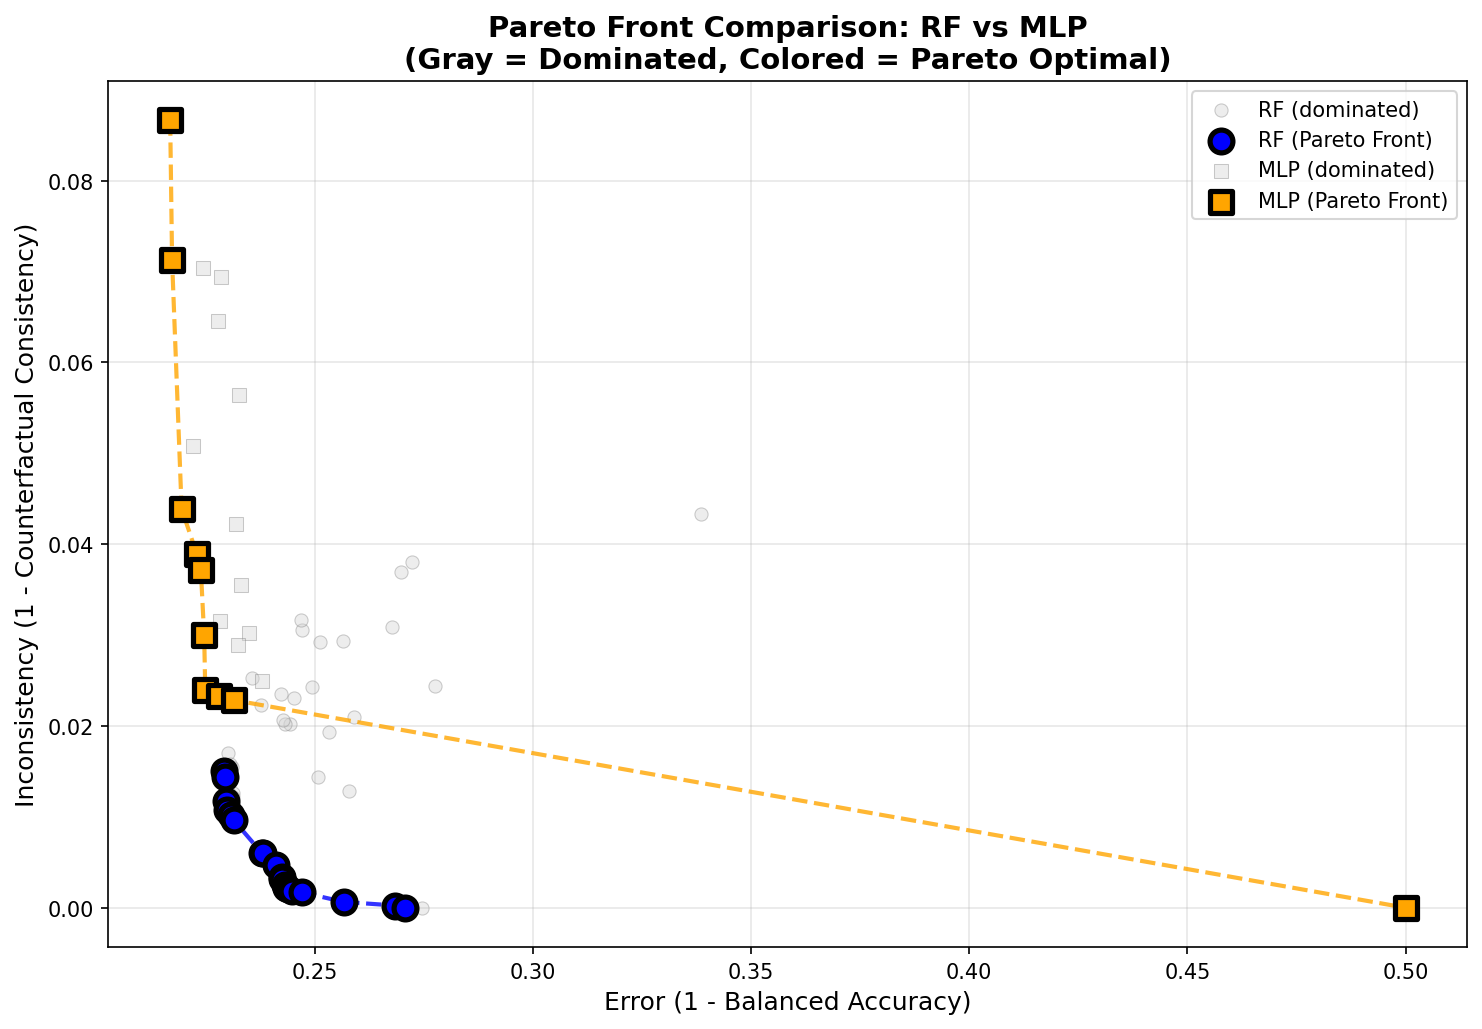

In [ ]:
# Generate Pareto comparison plot
pareto_path = f"{OUTPUT_DIR}/pareto_{DATASET_NAME}_{SENSITIVE_FEATURE}.png"
plot_pareto_comparison(results, output_path=pareto_path)

# Display the plot
display(Image(filename=pareto_path))


## 6. Visualization: Parallel Coordinate Plots (Slide 1)

See how hyperparameters affect accuracy and fairness.

**How to read:**
- Each vertical axis = one hyperparameter (+ objectives on the left)
- Each line = one hyperparameter configuration
- **Bold lines** = Pareto-optimal configurations
- **Color** = performance (green = good/low error, red = bad/high error)


Parallel coordinate plot saved to: ../plots/parallel_coords_adult_sex_rf.png

Random Forest - Parallel Coordinate Plot:


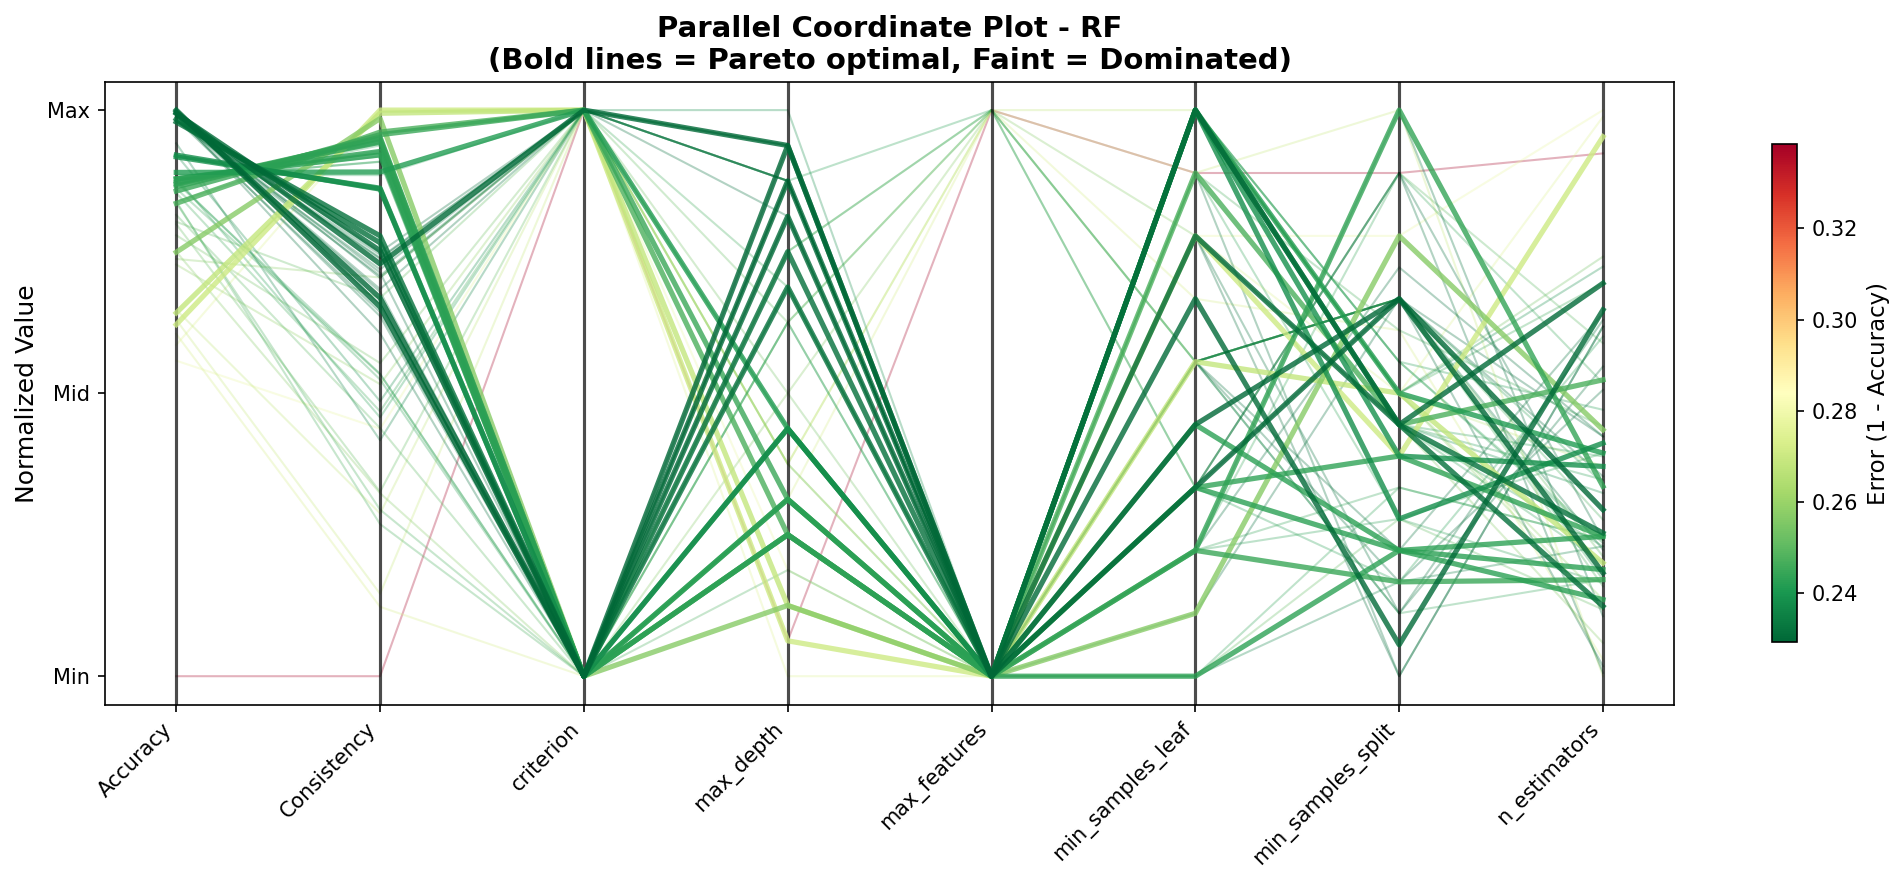

In [ ]:
# Random Forest parallel coordinates
rf_parallel_path = f"{OUTPUT_DIR}/parallel_coords_{DATASET_NAME}_{SENSITIVE_FEATURE}_rf.png"
plot_parallel_coordinates(results['rf'], 'rf', output_path=rf_parallel_path, color_by='error')

print("\nRandom Forest - Parallel Coordinate Plot:")
display(Image(filename=rf_parallel_path))


Parallel coordinate plot saved to: ../plots/parallel_coords_adult_sex_mlp.png

MLP - Parallel Coordinate Plot:


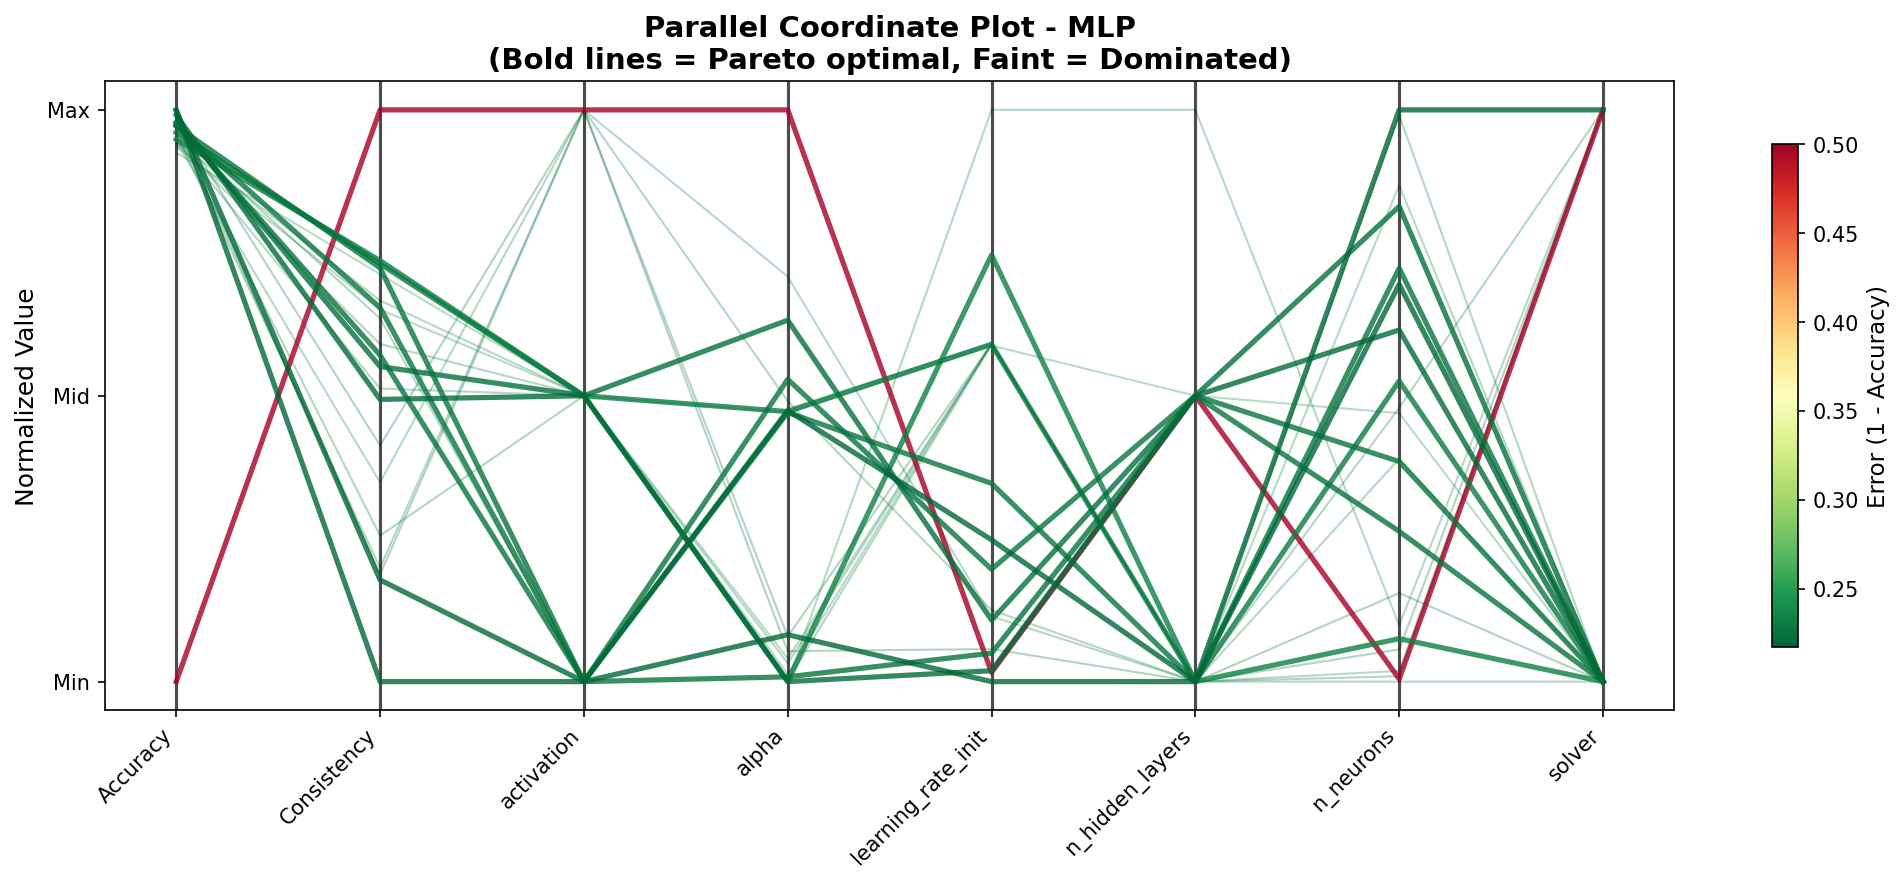

In [ ]:
# MLP parallel coordinates
mlp_parallel_path = f"{OUTPUT_DIR}/parallel_coords_{DATASET_NAME}_{SENSITIVE_FEATURE}_mlp.png"
plot_parallel_coordinates(results['mlp'], 'mlp', output_path=mlp_parallel_path, color_by='error')

print("\nMLP - Parallel Coordinate Plot:")
display(Image(filename=mlp_parallel_path))


/opt/anaconda3/envs/fairness/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


MDS projection plot saved to: ../plots/mds_projection_adult_sex_rf.png

Random Forest - MDS Projection:


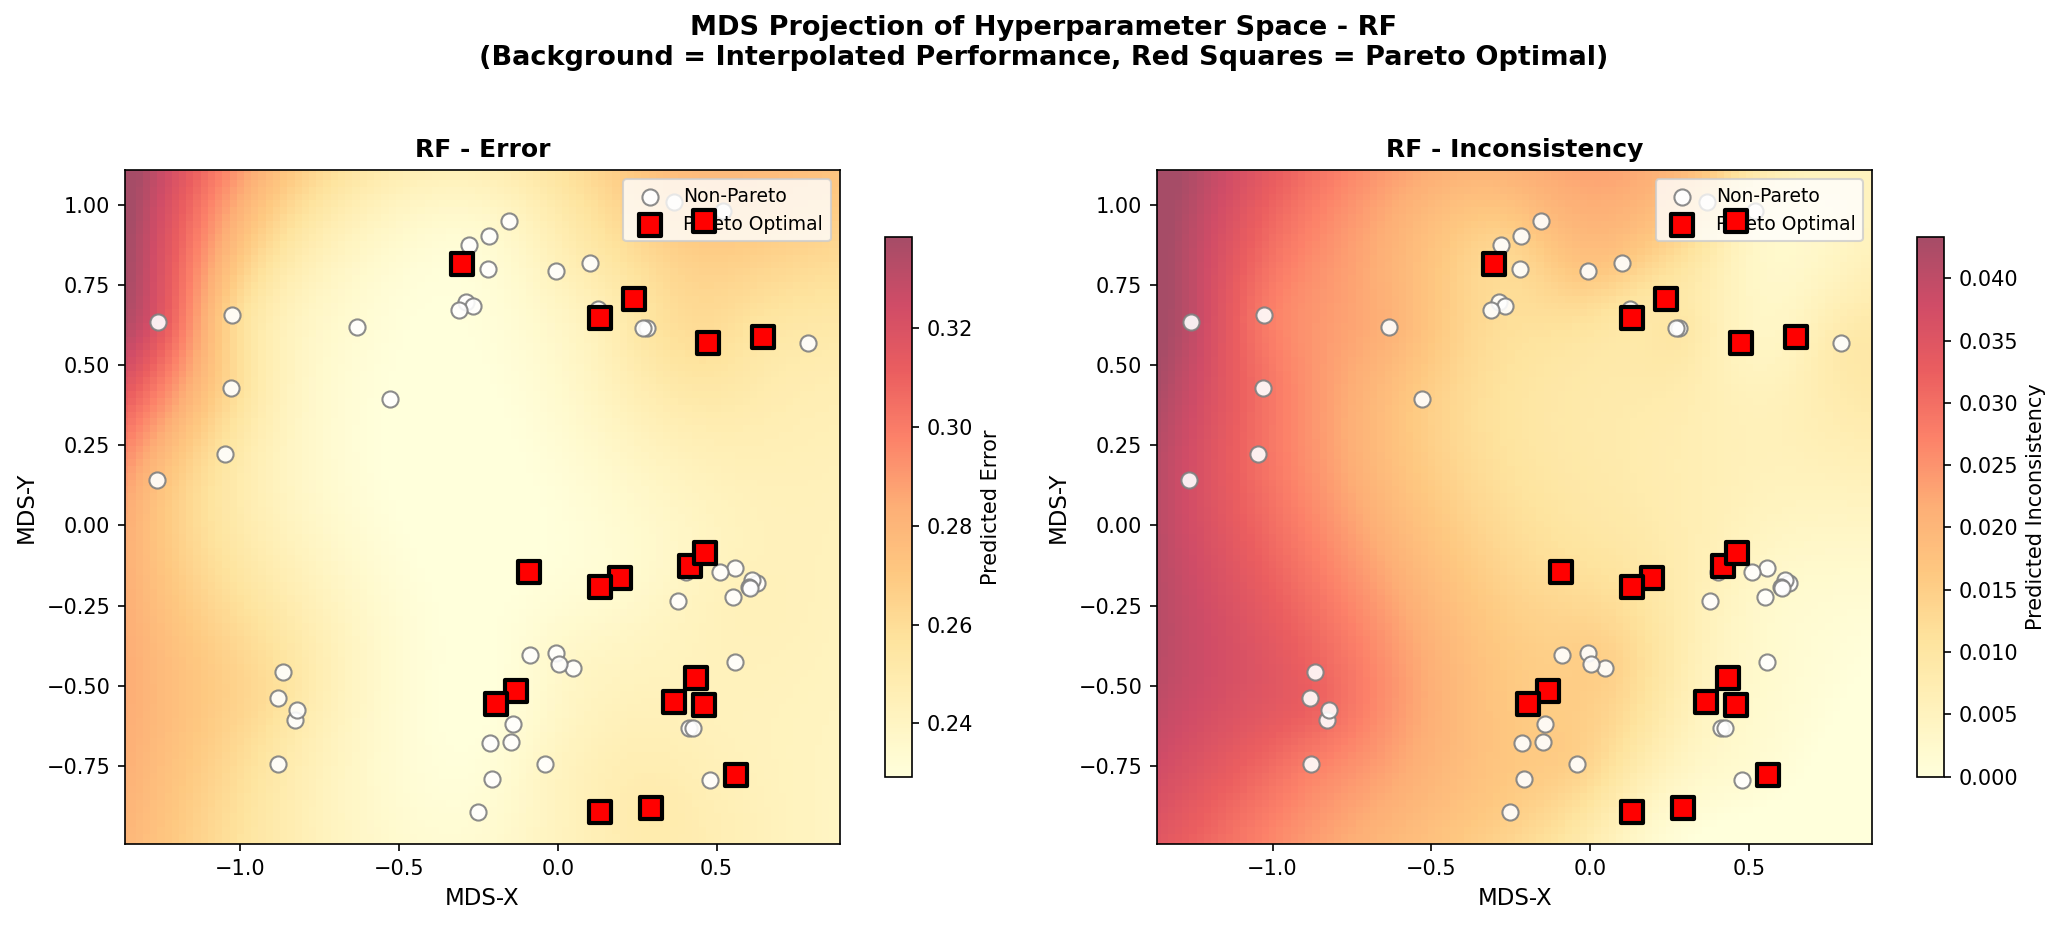

In [ ]:
# Random Forest MDS projection
rf_mds_path = f"{OUTPUT_DIR}/mds_projection_{DATASET_NAME}_{SENSITIVE_FEATURE}_rf.png"
plot_mds_projection(results['rf'], 'rf', output_path=rf_mds_path)

print("\nRandom Forest - MDS Projection:")
display(Image(filename=rf_mds_path))


/opt/anaconda3/envs/fairness/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


MDS projection plot saved to: ../plots/mds_projection_adult_sex_mlp.png

MLP - MDS Projection:


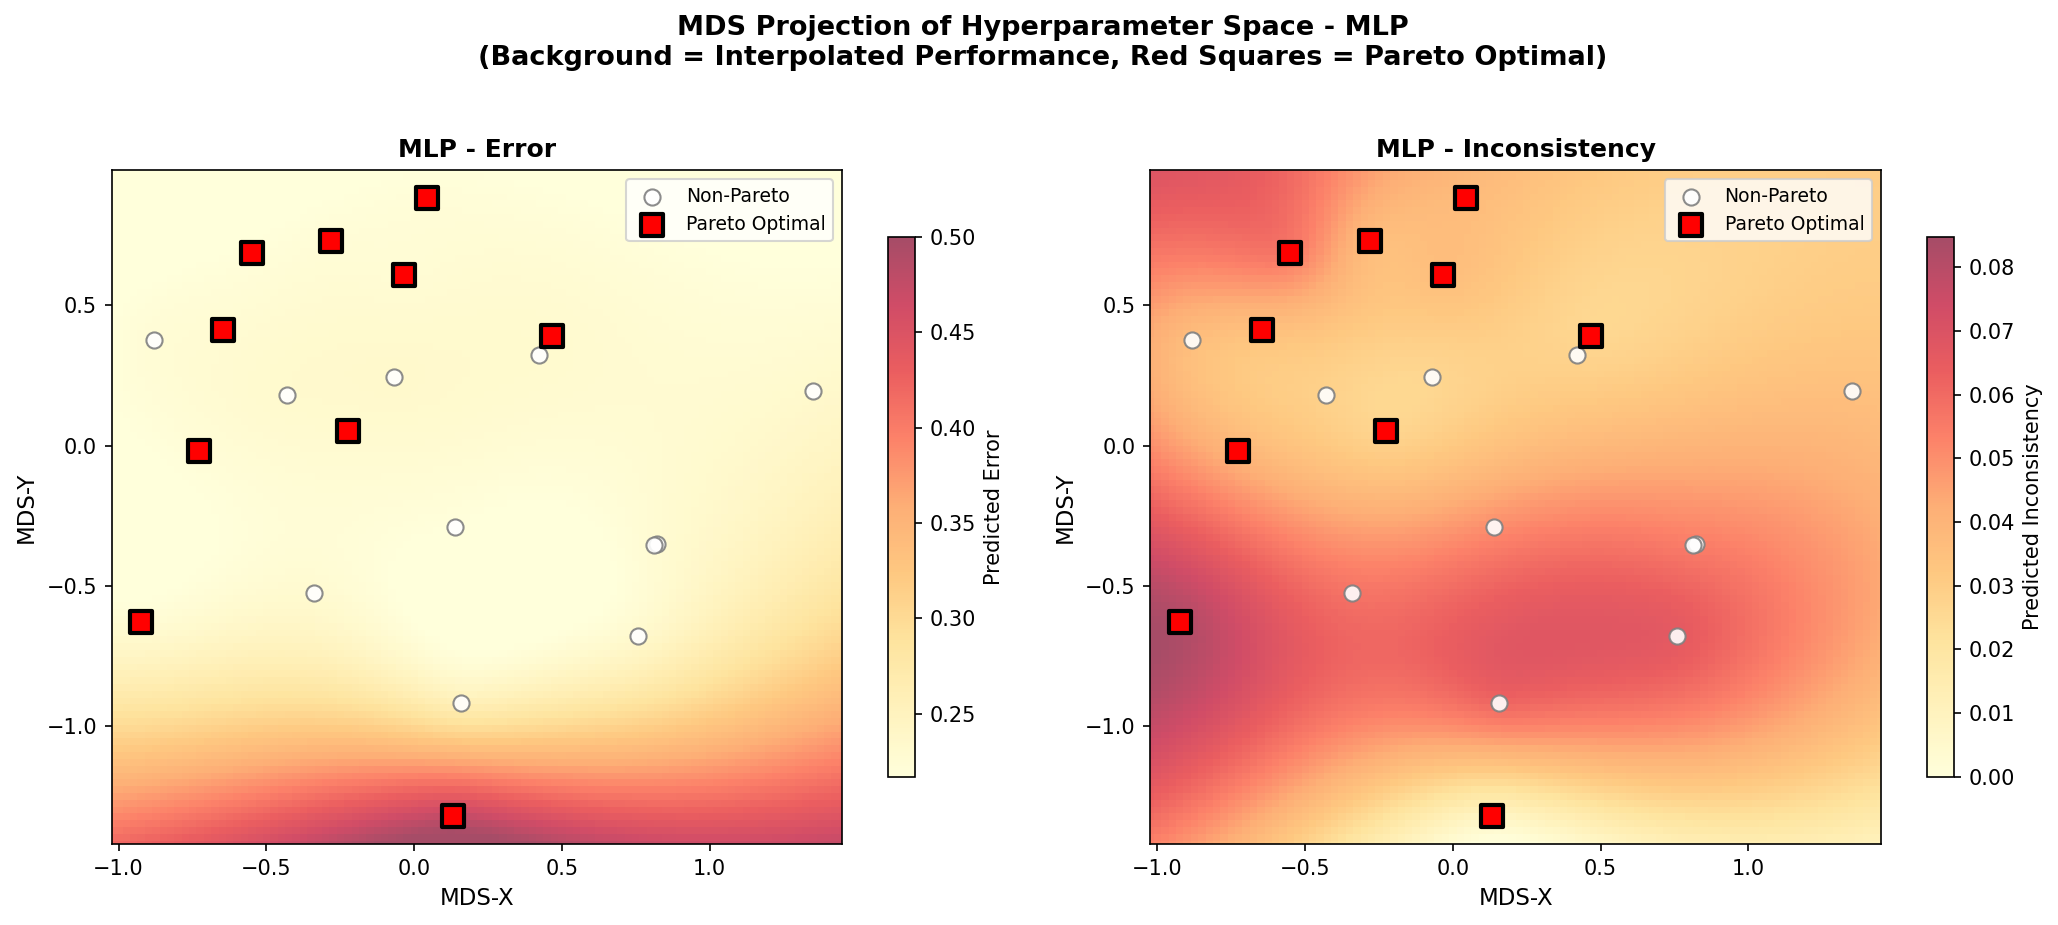

In [ ]:
# MLP MDS projection
mlp_mds_path = f"{OUTPUT_DIR}/mds_projection_{DATASET_NAME}_{SENSITIVE_FEATURE}_mlp.png"
plot_mds_projection(results['mlp'], 'mlp', output_path=mlp_mds_path)

print("\nMLP - MDS Projection:")
display(Image(filename=mlp_mds_path))


## 9. Debug: Investigate the 50% Accuracy MLP

Let's manually test the "fairest" MLP configuration to understand why it has exactly 50% balanced accuracy.


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import warnings

# Get the "fairest" MLP config
configs, costs = get_pareto_front(results['mlp'])
best_fair_idx = np.argmin(costs[:, 1])
fair_config = configs[best_fair_idx]

print("="*60)
print("DEBUGGING: Recreating the 'fairest' MLP manually")
print("="*60)
print(f"\nConfiguration:")
for key, value in dict(fair_config).items():
    print(f"  {key}: {value}")

# Create the MLP with the same hyperparameters
hidden_layer_sizes = tuple([fair_config["n_neurons"]] * fair_config["n_hidden_layers"])

mlp = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes,
    activation=fair_config["activation"],
    solver=fair_config["solver"],
    alpha=fair_config["alpha"],
    learning_rate_init=fair_config["learning_rate_init"],
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42,
    verbose=False
)

# Split data for testing
X_train_debug, X_test_debug, y_train_debug, y_test_debug = train_test_split(
    data['X_train'], data['y_train'], test_size=0.2, random_state=42, stratify=data['y_train']
)

print(f"\n--- Data Info ---")
print(f"X_train shape: {X_train_debug.shape}")
print(f"y_train distribution: {np.bincount(y_train_debug)}")
print(f"y_train positive rate: {y_train_debug.mean():.2%}")

# Train the model
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    mlp.fit(X_train_debug, y_train_debug)
    
    # Check for convergence warnings
    if w:
        print(f"\n--- Warnings during training ---")
        for warning in w:
            print(f"  {warning.message}")

print(f"\n--- Training Info ---")
print(f"Number of iterations: {mlp.n_iter_}")
print(f"Loss: {mlp.loss_:.4f}")
print(f"Best validation score: {mlp.best_validation_score_:.4f}" if hasattr(mlp, 'best_validation_score_') else "N/A")

# Check predictions
y_pred = mlp.predict(X_test_debug)
print(f"\n--- Prediction Analysis ---")
print(f"Unique predictions: {np.unique(y_pred)}")
print(f"Prediction distribution: {np.bincount(y_pred)}")
print(f"% predicting class 0: {(y_pred == 0).mean():.2%}")
print(f"% predicting class 1: {(y_pred == 1).mean():.2%}")

# Check balanced accuracy
ba = balanced_accuracy_score(y_test_debug, y_pred)
print(f"\n--- Performance ---")
print(f"Balanced Accuracy: {ba:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test_debug, y_pred, target_names=['<=50K', '>50K']))

# Check counterfactual consistency
from utils.datasets import create_flipped_data
X_test_flipped = create_flipped_data(X_test_debug, data['sensitive_col_idx'])
y_pred_flipped = mlp.predict(X_test_flipped)
consistency = (y_pred == y_pred_flipped).mean()
print(f"\n--- Counterfactual Consistency ---")
print(f"Consistency: {consistency:.4f}")
print(f"Number of changed predictions: {(y_pred != y_pred_flipped).sum()}")


TypeError: list indices must be integers or slices, not str

### Debug: Check Data Quality


In [ ]:
# Check data quality
print("="*60)
print("DATA QUALITY CHECK")
print("="*60)

X = data['X_train']
y = data['y_train']

print(f"\n--- Basic Info ---")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X dtype: {X.dtype}")
print(f"y dtype: {y.dtype}")

print(f"\n--- Missing Values ---")
print(f"NaN in X: {np.isnan(X).sum()}")
print(f"Inf in X: {np.isinf(X).sum()}")

print(f"\n--- Target Distribution ---")
unique, counts = np.unique(y, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Class {u}: {c} samples ({c/len(y):.2%})")

print(f"\n--- Feature Statistics ---")
print(f"X min: {X.min():.4f}")
print(f"X max: {X.max():.4f}")
print(f"X mean: {X.mean():.4f}")
print(f"X std: {X.std():.4f}")

print(f"\n--- Sensitive Feature ---")
sensitive_idx = data['sensitive_col_idx']
sensitive_col = X[:, sensitive_idx]
print(f"Sensitive column index: {sensitive_idx}")
print(f"Sensitive column name: {data['sensitive_col_name']}")
print(f"Unique values: {np.unique(sensitive_col)}")
print(f"Distribution: {np.bincount(sensitive_col.astype(int))}")

print(f"\n--- Sample of Features ---")
print(f"First 3 samples:")
for i in range(3):
    print(f"  Sample {i}: X={X[i, :5]}... y={y[i]}")

# Test a simple baseline model
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_debug, y_train_debug)
y_pred_dummy = dummy.predict(X_test_debug)
ba_dummy = balanced_accuracy_score(y_test_debug, y_pred_dummy)
print(f"\n--- Baseline (Dummy) ---")
print(f"Dummy classifier balanced accuracy: {ba_dummy:.4f}")
print(f"(This should be ~0.5 for balanced_accuracy with 'most_frequent' strategy)")


DATA QUALITY CHECK

--- Basic Info ---
X shape: (45222, 62)
y shape: (45222,)
X dtype: float32
y dtype: int64

--- Missing Values ---
NaN in X: 0
Inf in X: 0

--- Target Distribution ---
  Class 0: 34014 samples (75.22%)
  Class 1: 11208 samples (24.78%)

--- Feature Statistics ---
X min: -3.5719
X max: 2.3039
X mean: 0.1560
X std: 0.3845

--- Sensitive Feature ---
Sensitive column index: 46
Sensitive column name: sex_Male
Unique values: [0. 1.]
Distribution: [14695 30527]

--- Sample of Features ---
First 3 samples:
  Sample 0: X=[1.1287528 0.        0.        1.        0.       ]... y=0
  Sample 1: X=[1.1287528 0.        0.        0.        1.       ]... y=0
  Sample 2: X=[-0.43812162  0.          0.          1.          0.        ]... y=0

--- Baseline (Dummy) ---
Dummy classifier balanced accuracy: 0.5000
(This should be ~0.5 for balanced_accuracy with 'most_frequent' strategy)


## 8. Investigate Extreme Points

Let's look at the configuration with **minimum accuracy and maximum consistency** - this is often a "trivial" model that ignores features.


In [ ]:
import pandas as pd

for model_type in ['rf', 'mlp']:
    print(f"\n{'='*60}")
    print(f"{model_type.upper()} - Extreme Configurations Analysis")
    print(f"{'='*60}")
    
    configs, costs = get_pareto_front(results[model_type])
    
    # Find extremes on Pareto front
    best_acc_idx = np.argmin(costs[:, 0])  # Min error = best accuracy
    best_fair_idx = np.argmin(costs[:, 1])  # Min inconsistency = best fairness
    
    print(f"\n1. BEST ACCURACY configuration:")
    print(f"   Accuracy: {1-costs[best_acc_idx, 0]:.4f}")
    print(f"   Consistency: {1-costs[best_acc_idx, 1]:.4f}")
    print(f"   Hyperparameters:")
    for key, value in dict(configs[best_acc_idx]).items():
        print(f"      {key}: {value}")
    
    print(f"\n2. BEST FAIRNESS (consistency) configuration:")
    print(f"   Accuracy: {1-costs[best_fair_idx, 0]:.4f}")
    print(f"   Consistency: {1-costs[best_fair_idx, 1]:.4f}")
    print(f"   Hyperparameters:")
    for key, value in dict(configs[best_fair_idx]).items():
        print(f"      {key}: {value}")
    
    # Analysis
    print(f"\n3. INSIGHT:")
    if model_type == 'rf':
        fair_config = configs[best_fair_idx]
        if fair_config.get('max_depth', 100) <= 5 or fair_config.get('n_estimators', 100) <= 20:
            print("   → The fairest model is SIMPLE (shallow/few trees)")
            print("   → Simple models don't learn complex patterns, so they")
            print("     don't learn to discriminate based on sensitive features!")
    else:  # MLP
        fair_config = configs[best_fair_idx]
        if fair_config.get('n_neurons', 100) <= 32 or fair_config.get('n_hidden_layers', 2) <= 1:
            print("   → The fairest model has a SMALL network")
            print("   → Smaller networks have less capacity to learn")
            print("     discriminatory patterns from the sensitive feature!")



RF - Extreme Configurations Analysis


KeyError: 'rf'

### Debug: Test if Initial Weights Matter


In [ ]:
# Test the "fairest" MLP config with multiple random seeds
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import balanced_accuracy_score
import numpy as np

# The problematic config
fairest_config = {
    'hidden_layer_sizes': (27, 27),  # 2 hidden layers
    'activation': 'logistic',
    'solver': 'sgd',
    'alpha': 0.0367,
    'learning_rate_init': 0.0017,
    'max_iter': 1000,
    'early_stopping': True,
    'n_iter_no_change': 10,
}

print("Testing fairest MLP with different random seeds:")
print("=" * 60)

results = []
for seed in [42, 123, 456, 789, 999]:
    model = MLPClassifier(**fairest_config, random_state=seed)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    acc = balanced_accuracy_score(y_train, y_pred)
    unique_preds = np.unique(y_pred)
    results.append((seed, acc, len(unique_preds), model.n_iter_))
    print(f"Seed {seed}: Accuracy={acc:.4f}, Unique classes predicted: {len(unique_preds)}, Iterations: {model.n_iter_}")

print("\n" + "=" * 60)
print("CONCLUSION:")
if all(r[2] == 1 for r in results):
    print("→ ALL seeds produce single-class predictions")
    print("→ The problem is NOT initial weights - it's the hyperparameter combination!")
else:
    print("→ Some seeds work better - initial weights do matter")
    print("→ But this combination is still unreliable!")


Testing fairest MLP with different random seeds:


NameError: name 'X_train' is not defined

In [ ]:
# What if we ONLY change the activation from 'logistic' to 'relu'?
# This shows the real culprit is the sigmoid activation causing vanishing gradients

print("Same config but with ReLU instead of Logistic:")
print("=" * 60)

relu_config = fairest_config.copy()
relu_config['activation'] = 'relu'

for seed in [42, 123, 456]:
    model = MLPClassifier(**relu_config, random_state=seed)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    acc = balanced_accuracy_score(y_train, y_pred)
    unique_preds = np.unique(y_pred)
    print(f"Seed {seed}: Accuracy={acc:.4f}, Unique classes predicted: {len(unique_preds)}, Iterations: {model.n_iter_}")

print("\n→ ReLU doesn't have vanishing gradient problems, so even with")
print("   low learning rate + SGD, the network can still learn!")


In [ ]:
# Analyze the final weights of the "fairest" MLP
import matplotlib.pyplot as plt

# Train the fairest model again to inspect weights
model_to_inspect = MLPClassifier(**fairest_config, random_state=42)
model_to_inspect.fit(X_train, y_train)

print("=" * 70)
print("NEURAL NETWORK WEIGHT ANALYSIS")
print("=" * 70)

# Show network architecture
print(f"\nNetwork Architecture:")
print(f"  Input layer: {X_train.shape[1]} features")
for i, (coef, intercept) in enumerate(zip(model_to_inspect.coefs_, model_to_inspect.intercepts_)):
    layer_type = "Hidden" if i < len(model_to_inspect.coefs_) - 1 else "Output"
    print(f"  {layer_type} layer {i+1}: {coef.shape[0]} → {coef.shape[1]} neurons")

print(f"\nTraining stopped after {model_to_inspect.n_iter_} iterations")

# Analyze each layer's weights
print("\n" + "-" * 70)
print("WEIGHT STATISTICS PER LAYER:")
print("-" * 70)

fig, axes = plt.subplots(1, len(model_to_inspect.coefs_), figsize=(14, 4))
if len(model_to_inspect.coefs_) == 1:
    axes = [axes]

for i, (coef, intercept) in enumerate(zip(model_to_inspect.coefs_, model_to_inspect.intercepts_)):
    layer_name = f"Layer {i+1}" if i < len(model_to_inspect.coefs_) - 1 else "Output Layer"
    
    print(f"\n{layer_name} (shape: {coef.shape}):")
    print(f"  Weights - Min: {coef.min():.6f}, Max: {coef.max():.6f}, Mean: {coef.mean():.6f}, Std: {coef.std():.6f}")
    print(f"  Biases  - Min: {intercept.min():.6f}, Max: {intercept.max():.6f}, Mean: {intercept.mean():.6f}")
    
    # Histogram of weights
    axes[i].hist(coef.flatten(), bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{layer_name}\nWeights Distribution')
    axes[i].set_xlabel('Weight Value')
    axes[i].set_ylabel('Frequency')
    axes[i].axvline(x=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('../plots/fairest_mlp_weights.png', dpi=150, bbox_inches='tight')
plt.show()

# Check if weights are essentially at initialization values
print("\n" + "=" * 70)
print("DIAGNOSIS:")
print("=" * 70)
total_weights = sum(c.size for c in model_to_inspect.coefs_)
small_weights = sum((np.abs(c) < 0.1).sum() for c in model_to_inspect.coefs_)
print(f"Total weights: {total_weights}")
print(f"Weights with |value| < 0.1: {small_weights} ({100*small_weights/total_weights:.1f}%)")
print(f"\n→ Small weights + sigmoid activation = outputs near 0.5 for all samples")
print(f"→ The network never learned to distinguish between classes!")


In [ ]:
# Look at the output probabilities - this shows why it predicts only one class
proba = model_to_inspect.predict_proba(X_train)

print("=" * 70)
print("OUTPUT PROBABILITY ANALYSIS")
print("=" * 70)

print(f"\nProbability for class 1 (>50K income):")
print(f"  Min:  {proba[:, 1].min():.6f}")
print(f"  Max:  {proba[:, 1].max():.6f}")
print(f"  Mean: {proba[:, 1].mean():.6f}")
print(f"  Std:  {proba[:, 1].std():.6f}")

# Plot distribution of probabilities
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram of P(class=1)
axes[0].hist(proba[:, 1], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision boundary')
axes[0].set_xlabel('P(class = 1)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Predicted Probabilities')
axes[0].legend()

# Compare to a working model (the best accuracy one)
best_acc_config = {
    'hidden_layer_sizes': (239,),  # 1 hidden layer
    'activation': 'relu',
    'solver': 'sgd',
    'alpha': 0.0174,
    'learning_rate_init': 0.0232,
    'max_iter': 1000,
    'early_stopping': True,
    'n_iter_no_change': 10,
    'random_state': 42
}
good_model = MLPClassifier(**best_acc_config)
good_model.fit(X_train, y_train)
good_proba = good_model.predict_proba(X_train)

axes[1].hist(good_proba[:, 1], bins=50, edgecolor='black', alpha=0.7, color='forestgreen')
axes[1].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision boundary')
axes[1].set_xlabel('P(class = 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Best Accuracy MLP - Probabilities')
axes[1].legend()

plt.suptitle('Fairest MLP (left) vs Best Accuracy MLP (right)', fontsize=12, y=1.02)
plt.tight_layout()
plt.savefig('../plots/mlp_probability_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "=" * 70)
print("KEY INSIGHT:")
print("=" * 70)
print("→ Fairest MLP: All probabilities are on ONE side of 0.5 → single class prediction")
print("→ Good MLP: Probabilities span BOTH sides of 0.5 → can predict both classes")
print("→ The fairest model's sigmoid outputs are 'stuck' due to vanishing gradients!")
